In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, recall_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold

In [370]:
churn_data = pd.read_csv('Churn.csv')
churn_data.sample(12)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3773,3774,15747854,Rudd,749,France,Female,35,3,0.00,3,1,1,132649.85,0
3000,3001,15584545,Aksenov,532,France,Female,40,5,0.00,2,0,1,177099.71,0
4773,4774,15709451,Gordon,646,Germany,Female,35,1,121952.75,2,1,1,142839.82,0
8917,8918,15757865,Powell,642,France,Male,62,7,0.00,2,1,1,61120.75,0
1570,1571,15607133,Shih,717,Spain,Female,49,1,110864.38,2,1,1,124532.90,1
9430,9431,15591980,Hill,753,France,Male,33,5,122568.05,2,1,1,82820.85,0
2572,2573,15785865,Mazzanti,711,France,Male,58,9,91285.13,2,1,1,26767.85,0
5462,5463,15693162,Higgins,694,France,Female,29,5,99713.87,1,0,0,112317.89,0
212,213,15573152,Glassman,620,France,Female,41,9,0.00,2,0,0,88852.47,0
2299,2300,15763171,Hu,650,Germany,Female,25,2,114330.95,1,1,1,25325.07,0


In [371]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

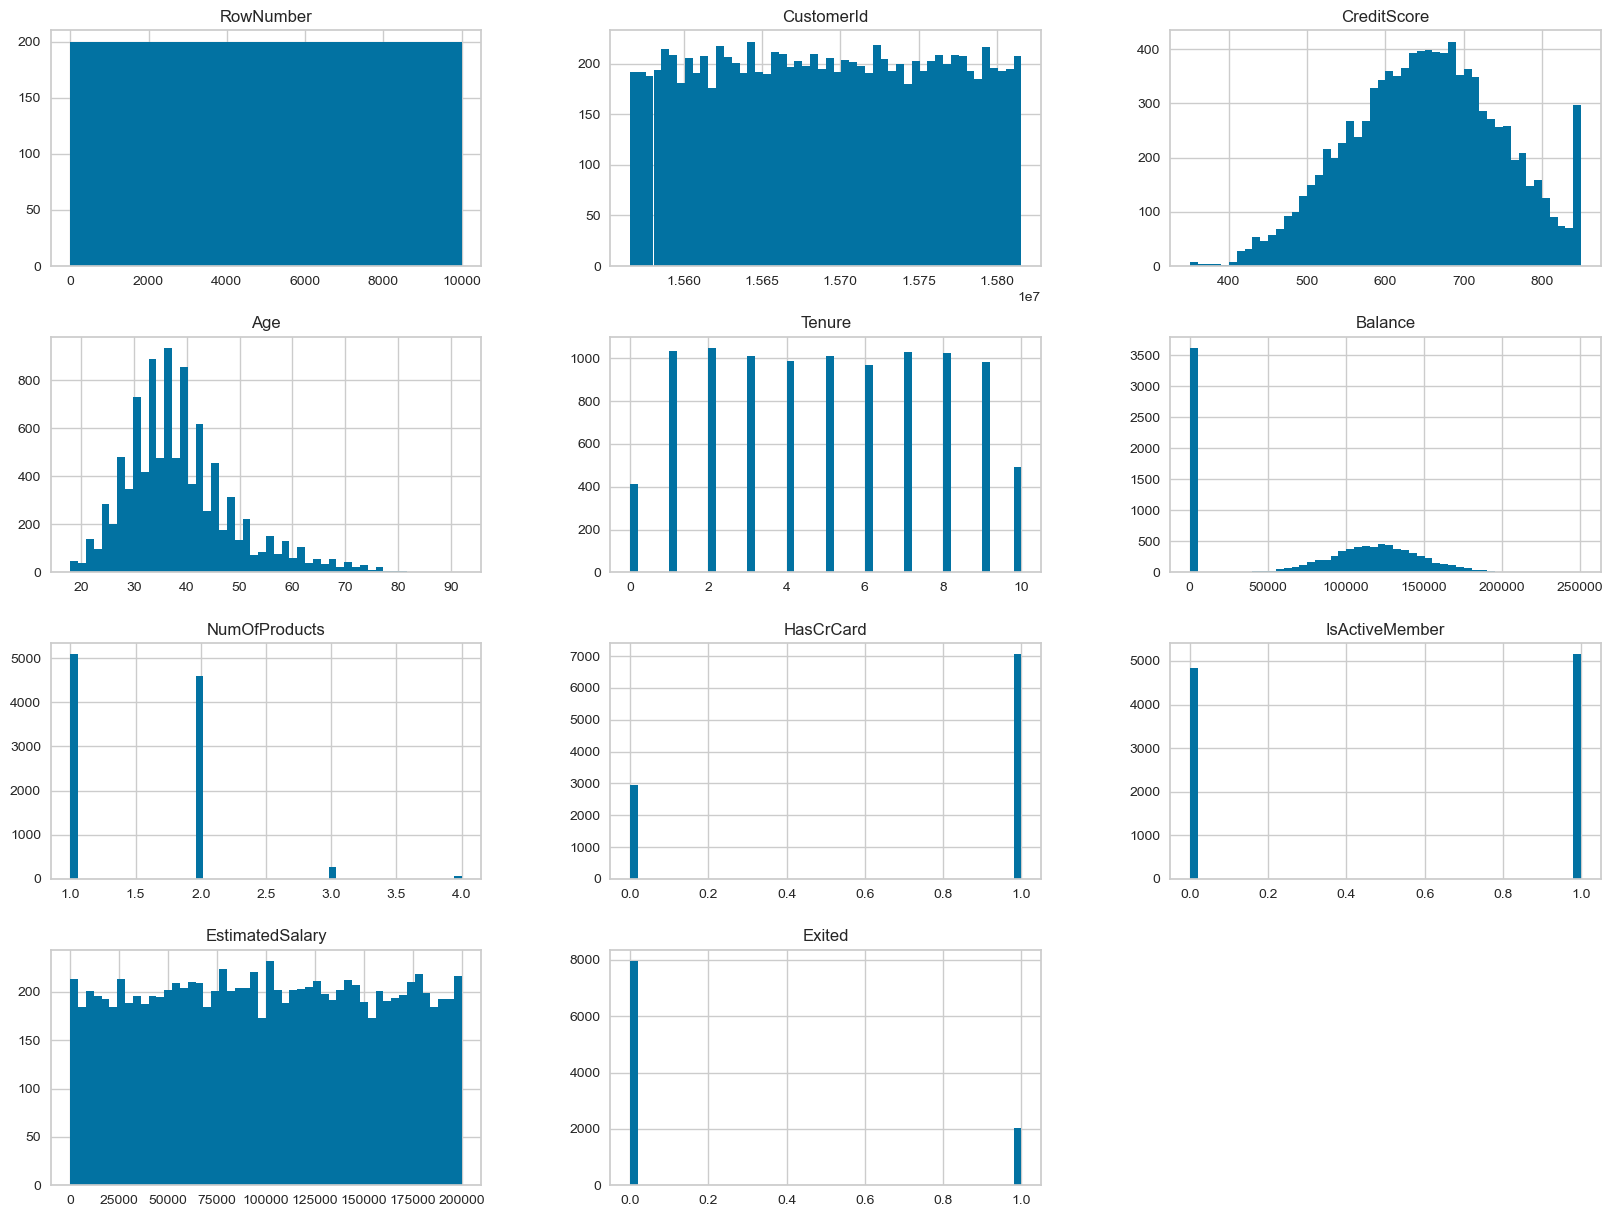

In [372]:
churn_data.hist(bins=50, figsize=(20,15))

In [373]:
train_data, test_data = train_test_split(churn_data, test_size=0.2, random_state=42, stratify=churn_data['Exited'])

In [374]:
def plot_exit_probablity_by_feature(data, feature):    
    churn_by_feature = data.groupby(feature)['Exited'].value_counts(normalize=True).unstack()
    churn_by_feature.plot(kind='bar', figsize=(10,5))

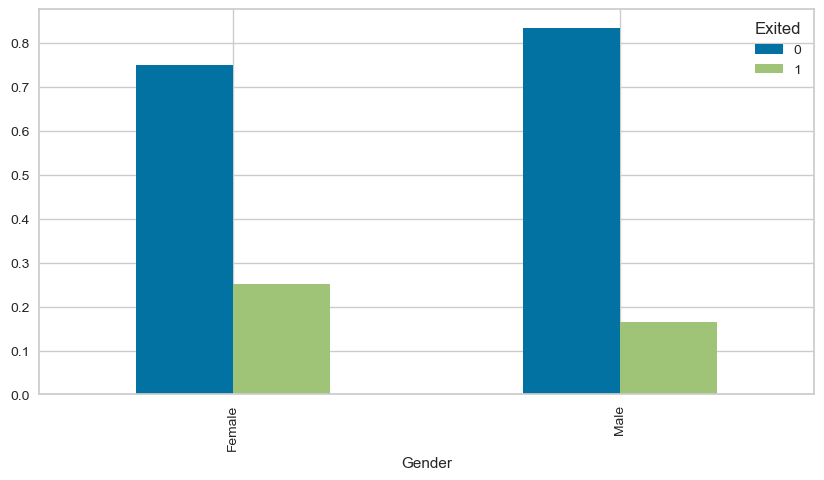

In [375]:
plot_exit_probablity_by_feature(train_data, 'Gender')

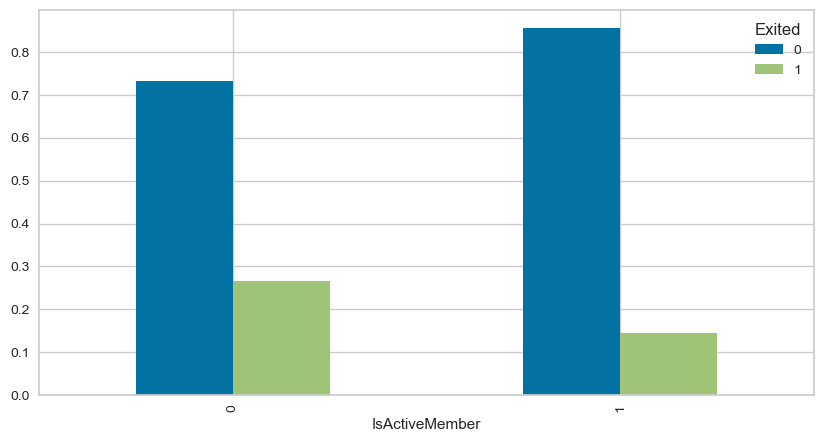

In [376]:
plot_exit_probablity_by_feature(train_data, 'IsActiveMember')

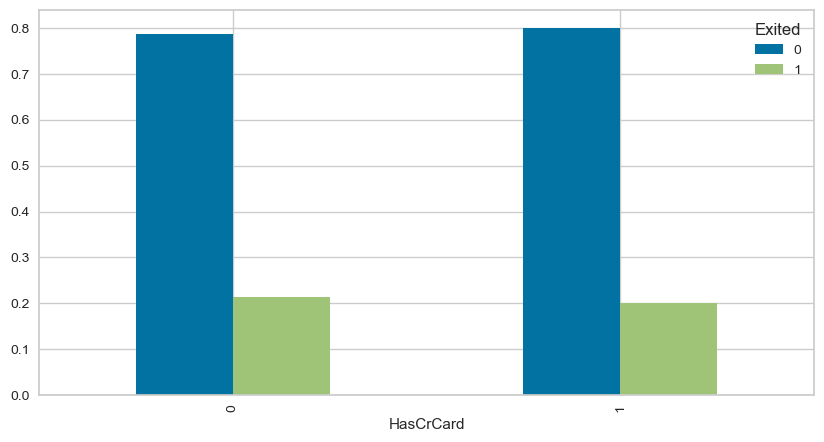

In [377]:
plot_exit_probablity_by_feature(train_data, 'HasCrCard')

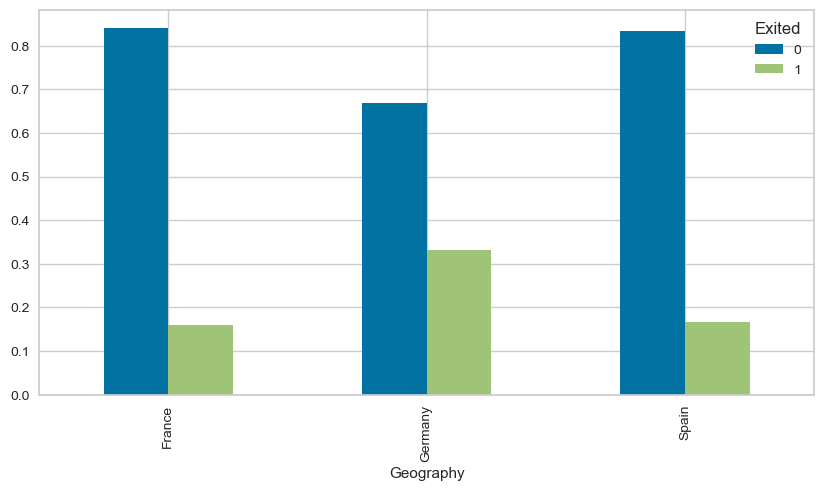

In [378]:
plot_exit_probablity_by_feature(train_data, 'Geography')

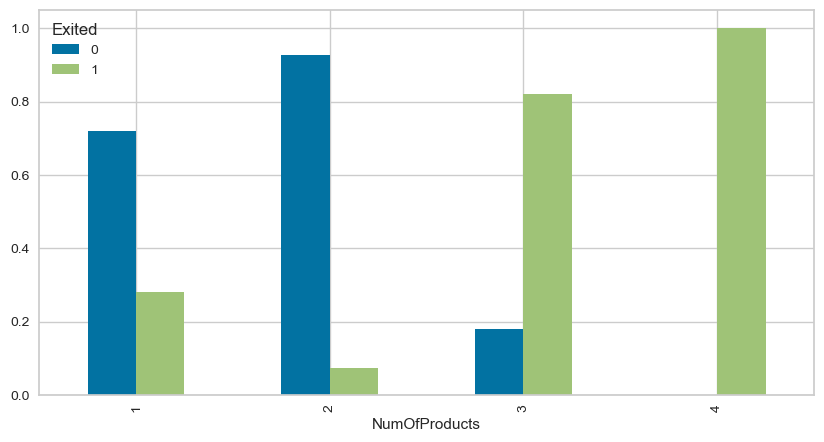

In [379]:
plot_exit_probablity_by_feature(train_data, 'NumOfProducts')

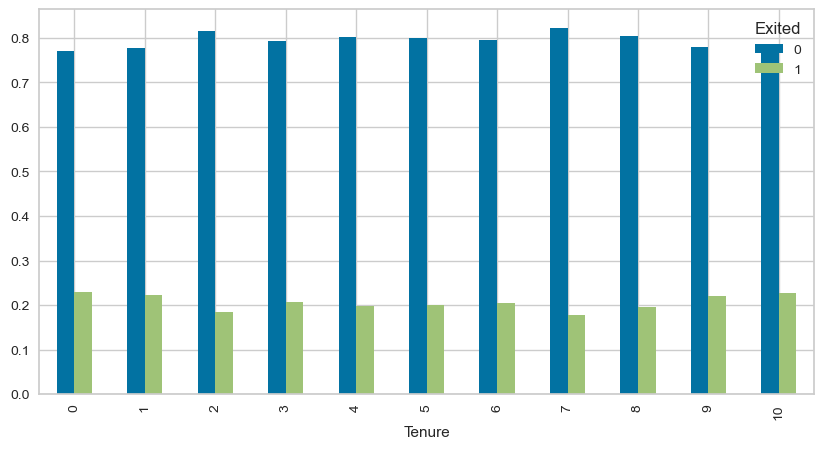

In [380]:
plot_exit_probablity_by_feature(train_data, 'Tenure')

In [381]:
temp_train_data = train_data.copy()
temp_train_data['AgeCat'] = (temp_train_data['Age'] // 10) * 10
temp_train_data['BalanceCat'] = (temp_train_data['Balance'] // 100000) * 100000
temp_train_data['CreditScoreCat'] = (temp_train_data['CreditScore'] // 100) * 100
temp_train_data['EstimatedSalaryCat'] = (temp_train_data['EstimatedSalary'] // 10000) * 10000

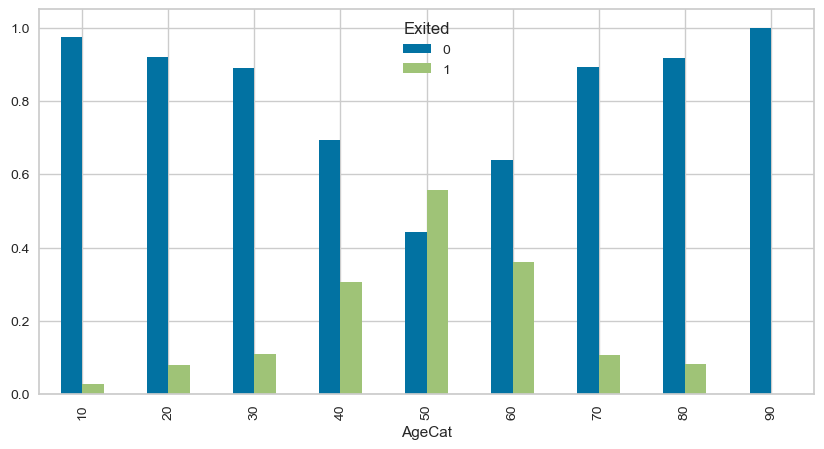

In [382]:
plot_exit_probablity_by_feature(temp_train_data, 'AgeCat')

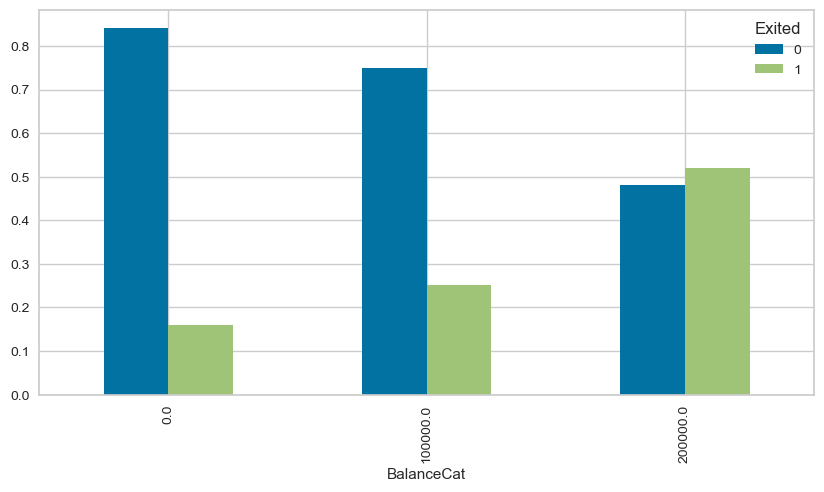

In [383]:
plot_exit_probablity_by_feature(temp_train_data, 'BalanceCat')

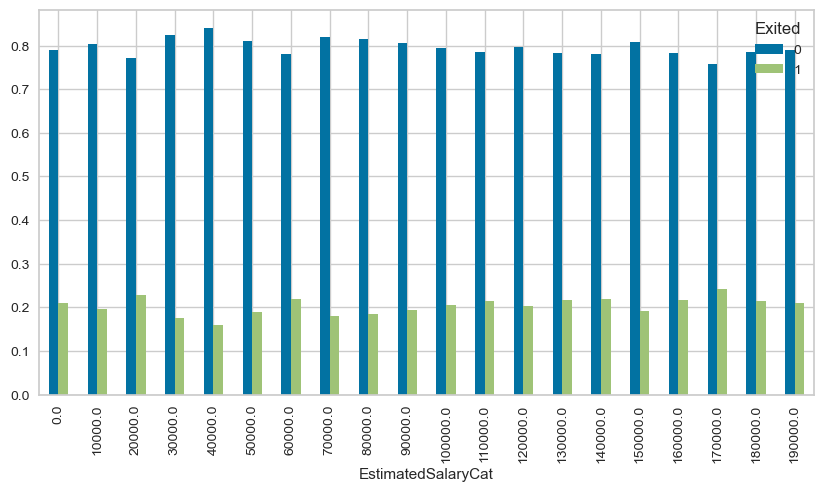

In [384]:
plot_exit_probablity_by_feature(temp_train_data, 'EstimatedSalaryCat')

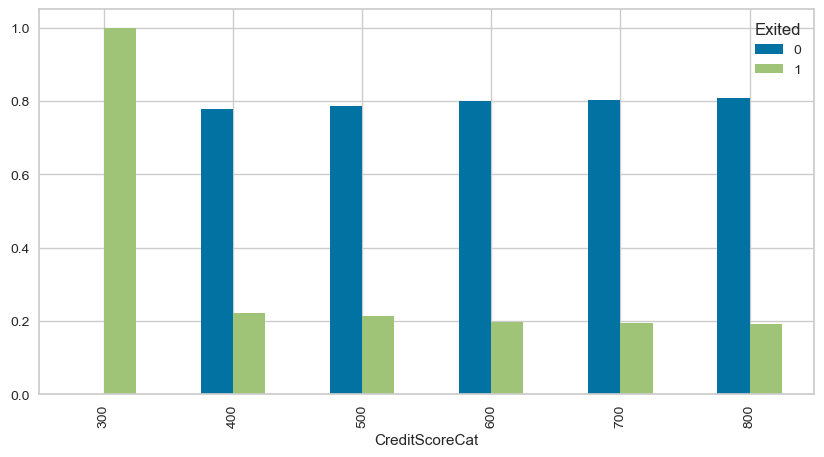

In [385]:
plot_exit_probablity_by_feature(temp_train_data, 'CreditScoreCat')

In [386]:
def scatterplot_2features(data, feature1, feature2):
    sns.scatterplot(x=feature1, y=feature2, hue='Exited', data=data, alpha=0.3)

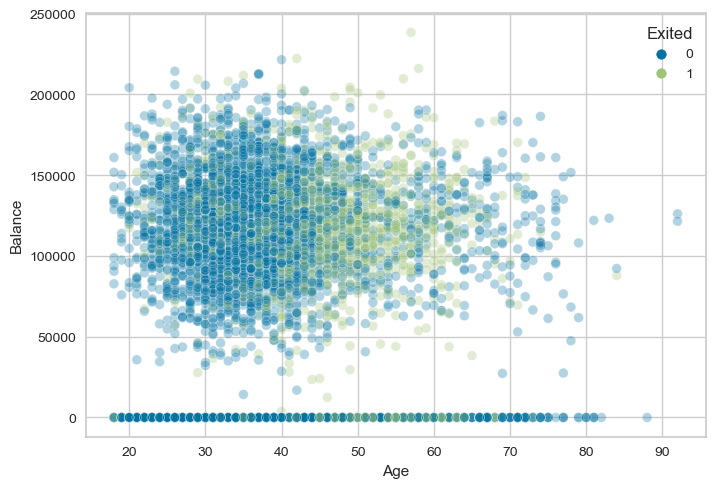

In [387]:
scatterplot_2features(train_data, 'Age', 'Balance')

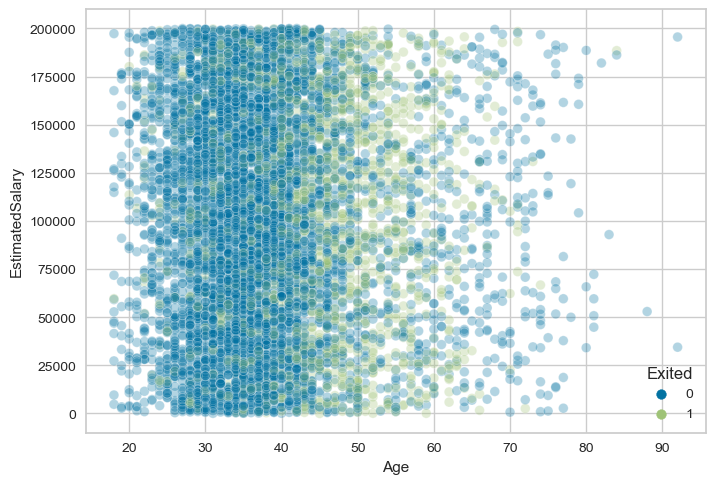

In [388]:
scatterplot_2features(train_data, 'Age', 'EstimatedSalary')

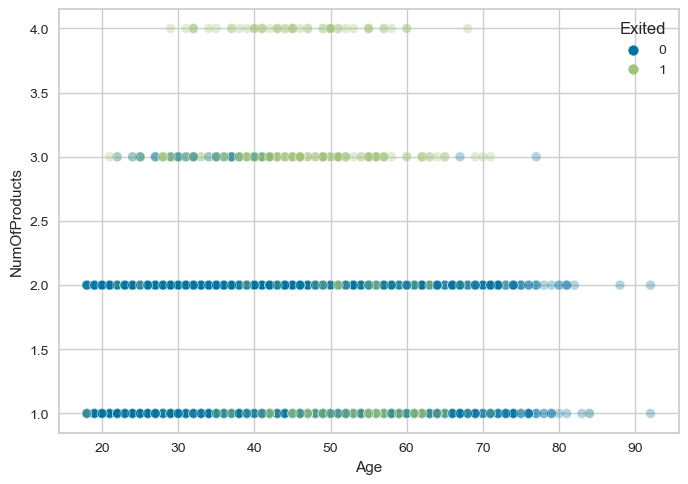

In [389]:
scatterplot_2features(train_data, 'Age', 'NumOfProducts')

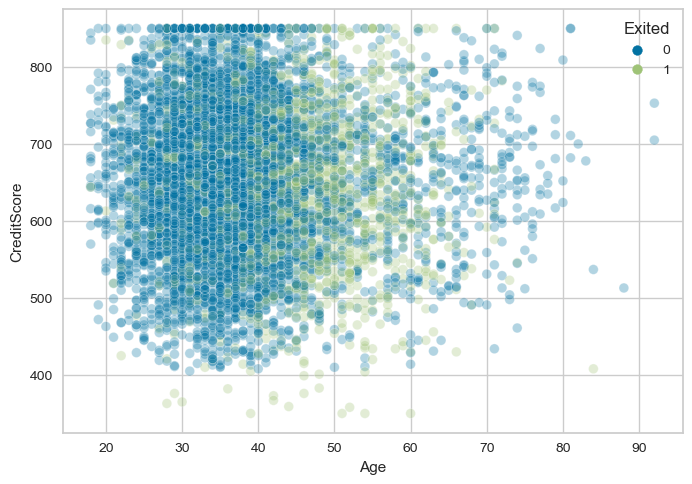

In [390]:
scatterplot_2features(train_data, 'Age', 'CreditScore')

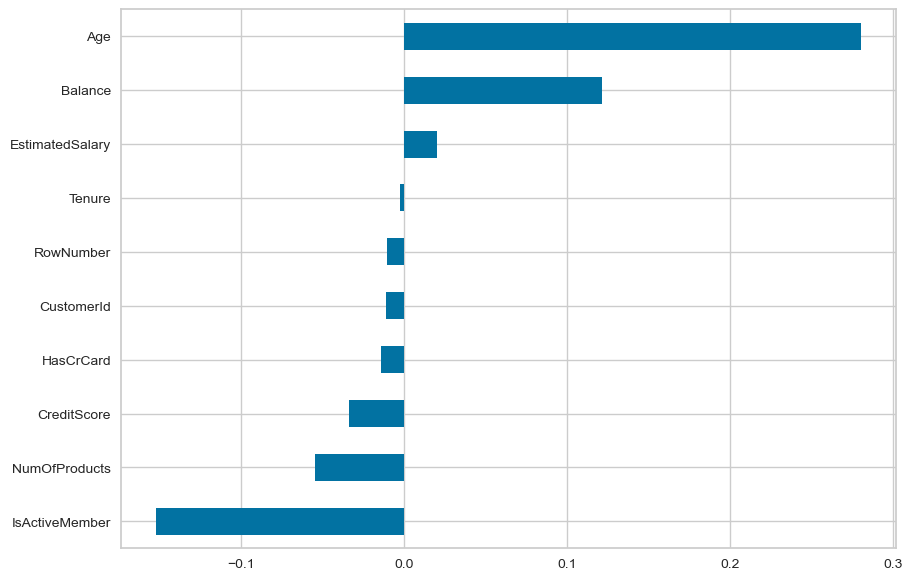

In [391]:
plt.figure(figsize=(10,7))
train_data.corr()['Exited'].sort_values().drop('Exited').plot(kind='barh')
plt.grid(True)
plt.show()

In [392]:
class CatFeatureEncoder(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_new = X.copy()
        X_new['Gender'] = X_new['Gender'].map({'Male':0,'Female':1})
        X_new = pd.get_dummies(X_new, columns=['Geography'], drop_first=True)
        return X_new

In [393]:
class UselessFeatureDropper(BaseEstimator, TransformerMixin):
        
    def __init__(self, useless_features = None) -> None:
        self.useless_features = useless_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        useless_features = ['RowNumber', 'CustomerId', 'Surname']
        X_new = X.copy()
        X_new.drop(useless_features, axis=1, inplace=True)
        return X_new

In [394]:
preprocessor = Pipeline([
    ('feature_encoder', CatFeatureEncoder()),
    ('feature_dropper', UselessFeatureDropper()),
    ('scaler', RobustScaler()),
    # ('pca', PCA(n_components=0.95))
])

In [395]:
X_train = preprocessor.fit_transform(train_data.drop('Exited', axis=1))
y_train = train_data['Exited'].values

In [396]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [397]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
y_pred = cross_val_predict(rfc, X_train, y_train, cv=skf)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6370
           1       0.79      0.44      0.56      1630

    accuracy                           0.86      8000
   macro avg       0.83      0.70      0.74      8000
weighted avg       0.86      0.86      0.85      8000



In [398]:
xgb = XGBClassifier(n_estimators=80, random_state=42)
y_pred = cross_val_predict(xgb, X_train, y_train, cv=skf)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6370
           1       0.70      0.49      0.58      1630

    accuracy                           0.85      8000
   macro avg       0.79      0.72      0.74      8000
weighted avg       0.84      0.85      0.84      8000



In [399]:
dt = DecisionTreeClassifier(random_state=42)
y_pred = cross_val_predict(dt, X_train, y_train, cv=skf)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6370
           1       0.48      0.50      0.49      1630

    accuracy                           0.79      8000
   macro avg       0.67      0.68      0.68      8000
weighted avg       0.79      0.79      0.79      8000



In [400]:
lsvm = LinearSVC(random_state=42)
y_pred = cross_val_predict(lsvm, X_train, y_train, cv=skf)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6370
           1       0.64      0.15      0.25      1630

    accuracy                           0.81      8000
   macro avg       0.73      0.57      0.57      8000
weighted avg       0.78      0.81      0.76      8000



In [401]:
svm = SVC(kernel='rbf', random_state=42)
y_pred = cross_val_predict(svm, X_train, y_train, cv=skf)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6370
           1       0.81      0.38      0.52      1630

    accuracy                           0.86      8000
   macro avg       0.83      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [402]:
lg = LogisticRegression(penalty='l2')
y_pred = cross_val_predict(lg, X_train, y_train, cv=skf)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6370
           1       0.60      0.21      0.31      1630

    accuracy                           0.81      8000
   macro avg       0.71      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000



In [403]:
# It seems that XGBClassifier is the best
# Let's try to tune it
param_grid = {'n_estimators': [20, 50, 90, 110, 130], 'max_depth': [3, 5, 7, 9]}
gs = GridSearchCV(XGBClassifier(random_state=42), param_grid=param_grid, scoring='f1', cv=skf)

In [404]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='binary:logistic', ...),
             n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [20, 50, 90, 110, 130]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [405]:
gs.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [406]:
X_test = preprocessor.transform(test_data.drop('Exited', axis=1))
y_test = test_data['Exited'].values

In [407]:
best_xgbc = XGBClassifier(**gs.best_params_)
best_xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [408]:
y_pred = best_xgbc.predict(X_test)
y_probs = best_xgbc.predict_proba(X_test)[:, 1]

In [409]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



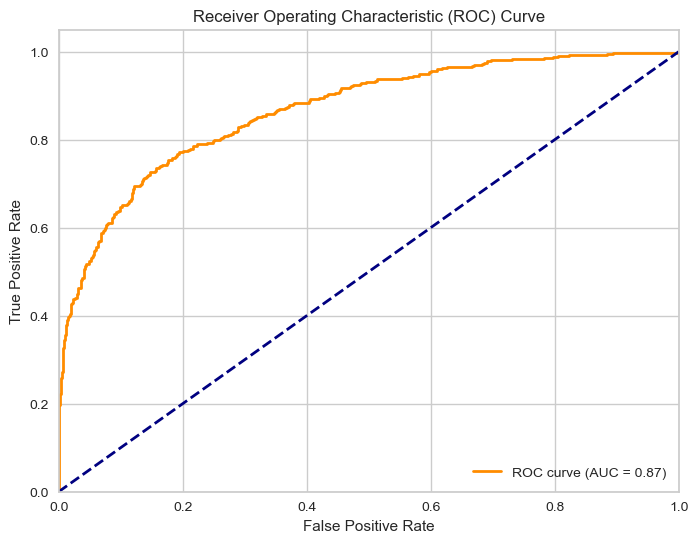

In [410]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [411]:
best_threshold = None
best_f1_score = 0

for threshold in thresholds:
    y_pred = (y_probs > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {best_f1_score:.2f}")


Best Threshold: 0.27
Best F1 Score: 0.64


In [412]:
optimal_threshold = 0.27
y_pred_optimal = (y_probs > optimal_threshold).astype(int)
recall_at_optimal_threshold = recall_score(y_test, y_pred_optimal)
recall_at_optimal_threshold

0.6953316953316954

In [413]:
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1593
           1       0.58      0.70      0.63       407

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000

